In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import dvc.api
data_path = dvc.api.get_url('data/books_data.csv')

books = pd.read_csv(data_path)

ImportError: Please install gdrivefs for access to Google Drive

In [201]:
books.shape

(212404, 10)

In [202]:
books.isna().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [203]:
books.columns

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')

In [204]:
books.head()
#We see that the columns 'previewLink' and 'infolink' are yet the same.
#therefore we drop one of them out. 

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [205]:
books.drop('infoLink',axis=1,inplace=True)

In [206]:
books.dropna(inplace=True)

In [207]:
books.isna().sum()

Title            0
description      0
authors          0
image            0
previewLink      0
publisher        0
publishedDate    0
categories       0
ratingsCount     0
dtype: int64

##### we see that the columns 'author' and 'categories'  have a list data type.
##### we extract the information from them

In [208]:
books['categories'] = books['categories'].apply(lambda x: ' '.join(re.findall(r'\w+|\d+',x)))
books['authors'] = books['authors'].apply(lambda x: ' '.join(re.findall(r'\w+|\d+',x)))

In [209]:
books.head(2)

,Title,description,authors,image,previewLink,publisher,publishedDate,categories,ratingsCount
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,Religion,5.0
31,Voices from the Farm: Adventures in Community ...,"Twenty-five years ago, at the height of the co...",Rupert Fike,http://books.google.com/books/content?id=IjTAB...,http://books.google.nl/books?id=IjTABgAAQBAJ&p...,Book Publishing Company,2012-08-21,Biography Autobiography,1.0


count    40635.000000
mean        24.054608
std        218.280285
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       4895.000000
Name: ratingsCount, dtype: float64


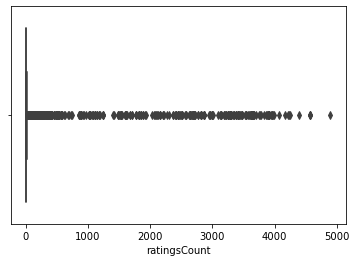

In [210]:
sns.boxplot(data = books, x= books['ratingsCount'])
print(books['ratingsCount'].describe())

##### We see that all the central tendencies are very low around 2.0. 
##### To generate a better output from the recommendation system, we take into account for only those books which have ratings count greater than 50. This would help in reducing the computation cost also.

In [211]:
books_small = books[books['ratingsCount']>50]

In [212]:
books_small.shape

(1349, 9)

In [213]:
books_small.drop_duplicates(subset=['image'],inplace=True)
books_small= books_small.reset_index()
books_small.drop('index',axis=1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14312\673900308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_small.drop_duplicates(subset=['image'],inplace=True)


In [214]:
print(books_small.shape)
books_small.head(2)

(1053, 9)


,Title,description,authors,image,previewLink,publisher,publishedDate,categories,ratingsCount
0,The Best Short Stories of Edgar Allan Poe,"A complete collection of the writings of Poe, ...",Edgar Allan Poe,http://books.google.com/books/content?id=XVXxS...,http://books.google.nl/books?id=XVXxSBd6LVIC&d...,Bantam Books,1966,Fiction,1180.0
1,The Cruelest Months,"""Many mystery buffs have credited Louise Penny...",Louise Penny,http://books.google.com/books/content?id=p-12c...,http://books.google.nl/books?id=p-12cgAACAAJ&d...,Minotaur Books,2011-04-12,Fiction,84.0


In [215]:
books_small['categories'].value_counts().nlargest(5).index

Index(['Fiction', 'Juvenile Fiction', 'Religion', 'Biography Autobiography',
       'Young Adult Fiction'],
      dtype='object')

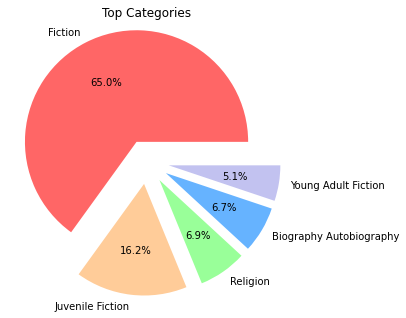

In [216]:
# Pie chart based on top categories
x = books_small['categories'].value_counts().nlargest(5).values.tolist()
explode = (0.2,0.2,0.2,0.2,0.2)
colors =  ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff','#c2c2f0']
labels = books_small['categories'].value_counts().nlargest(5).index.tolist()
plt.figure(figsize=(5,10))
plt.title('Top Categories')
plt.pie(x=x,explode=explode,labels=labels,colors=colors,autopct = '%1.1f%%')
plt.show()

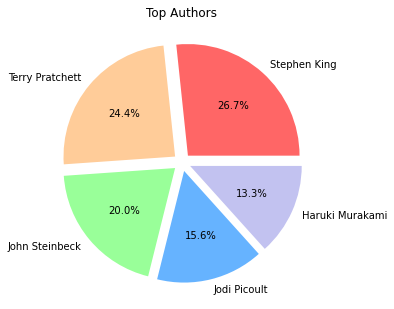

In [217]:
# Pie chart based on top authors
x = books_small['authors'].value_counts().nlargest(5).values.tolist()
explode = (0.08,0.08,0.08,0.08,0.08)
colors =  ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff','#c2c2f0']
labels = books_small['authors'].value_counts().nlargest(5).index.tolist()
plt.figure(figsize=(5,10))
plt.title('Top Authors')
plt.pie(x=x,explode=explode,labels=labels,colors=colors,autopct = '%1.1f%%')
plt.show()

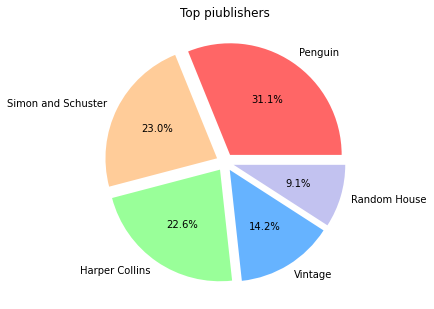

In [218]:
# Pie chart based on top piublishers
x = books_small['publisher'].value_counts().nlargest(5).values.tolist()
explode = (0.08,0.08,0.08,0.08,0.08)
colors =  ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff','#c2c2f0']
labels = books_small['publisher'].value_counts().nlargest(5).index.tolist()
plt.figure(figsize=(5,10))
plt.title('Top piublishers')
plt.pie(x=x,explode=explode,labels=labels,colors=colors,autopct = '%1.1f%%')
plt.show()

In [219]:
# Extracting Year from the data
date =[]
for i in range(books_small.shape[0]):
    ind = books_small.loc[i,'publishedDate']
    ind = re.findall(r'[0-9]{4}',ind)[0]
    date.append(ind)
books_small['publishedDate'] = date
books_small['publishedDate'] = books_small['publishedDate'].astype(int)

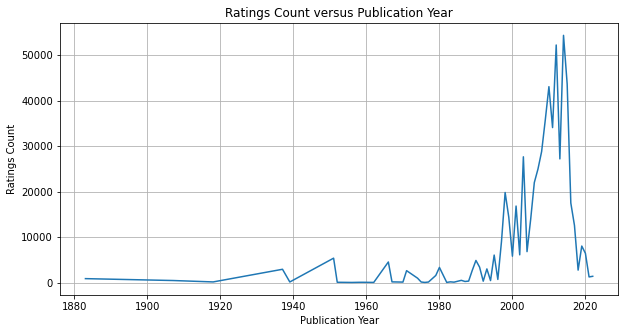

In [220]:
# Plot between 'Ratings Count versus Publication Year'
date_rate = books_small.groupby(['publishedDate']).sum()
plt.figure(figsize=(10,5))
plt.grid(visible=True)
plt.title('Ratings Count versus Publication Year')
sns.lineplot(data=date_rate,x='publishedDate',y='ratingsCount') 
plt.xlabel('Publication Year')
plt.ylabel('Ratings Count')
plt.show()

##### We can  see that people like reading modern books specially that of published during 2006-2016.

In [221]:
books_small['content'] = books_small['Title'] +' '+books_small['authors'] + ' ' + books_small['publisher'] +' '+  books_small['categories']

In [222]:
# defining own Stopwords with the help of stopwords in nltk
stop = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',    'yourself', 'more', 'if', 'on', 'don', "don't", 'once', 'this', 'being', 'as', 'there', 'should', 'its', 'been', 'didn', "you're", 'me', 'but', 'than', 'just', 'an', 'when', 'after', 'now', 'your', "needn't", 'aren', 'that', 'during', 've', 'yourselves', "you'll", 'who', 'whom', "hadn't", "weren't", "shouldn't", 'at', 'the', 'can', 'herself', 'from', 'those', "she's", 'hers', 'so', 'for', 'll', 'do', "didn't", 't', 's', 'to', 'wouldn', "hasn't", 'before', "shan't", 'too', "mightn't", 'above', 'most', 'him', 'theirs', 'has', 'she', 'i', 'here', 'be', 'because', 'd', 'y', "couldn't", 'doesn', "wouldn't", 'ma', 'all', 'doing', 'himself', 'are', 'o', "doesn't", 'what', 'my', 'up', "you've", 'nor', 'couldn', 'ours', 'his', 'themselves', 'which', 'in', 'having', "isn't", 'while', 'shan', 'below', 'ain', "won't", 'these', 'needn', "it's", 'why', 'were', 'mightn', 'won', 'itself', 'mustn', 'was', 'against', 'of', 'then', 'both', "wasn't", 'by', 'or', 'myself', 'a', 'only', 'we', 'down', 'no', 'between', 'some', 'hadn', 'where', 'until', 'other', 'did', 'they', 'have', "haven't", 'further', 'you', 'had', 'yours', 'through', 'same', "should've", 'he', 'off', 'will', 'few', 'ourselves', 'how', "aren't", 'wasn', 'our', 'isn', 'them', 'into', "that'll", "mustn't", 'such', 'their', 'hasn', 'm', 'weren', 'about', 'under', 'it', 'does', 'not', 'haven', "you'd", 'over', 'out', 'any', 'and', 'each', 'very', 'her', 'with', 'own', 're', 'shouldn', 'am', 'again', 'is']

In [223]:
lemmatizer = WordNetLemmatizer()
clear=[]
for i in range(books_small.shape[0]):
    ind= books_small.loc[i,['content']][0]
    ind = ' '.join(re.findall(r'\w+|\d+',ind))
    ind = ind.lower()
    ind = word_tokenize(ind)
    ind = [lemmatizer.lemmatize(word) for word in ind if word not in stop]
    clear.append(' '.join(ind))

In [224]:
books_small['final'] = clear

In [225]:
countvector = CountVectorizer(ngram_range=(1,1))
books_bow = countvector.fit_transform(books_small['final'])

In [226]:
tfidf = TfidfVectorizer(ngram_range=(1,1))
books_tfidf = tfidf.fit_transform(books_small['final'])

In [227]:
def preprocess(user_text):
    out= []
    user_text = [user_text]
    for i in user_text:
        ind = ' '.join(re.findall(r'\w+|\d+',i))
        ind = ind.lower()
        ind = word_tokenize(ind)
        ind = [lemmatizer.lemmatize(word) for word in ind if word not in stop]
        out.append(" ".join(ind))
    return out

In [249]:
def recommend(user_text):
    ind = preprocess(user_text)
    ind1 = preprocess(user_text)
    x = pd.Series(cosine_similarity(books_tfidf,countvector.transform(ind)).
               flatten()).nlargest(5).sort_values(ascending=False)
    ind= x.index.tolist()
    ind = books_small.loc[ind,['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'categories', 'ratingsCount']]
    ind['score'] = pd.Series(cosine_similarity(books_tfidf,tfidf.transform(ind1)).
               flatten()).nlargest(5).sort_values(ascending=False).values.tolist()
    return ind

In [251]:
def recommendBIG(user_text):
    ind = preprocess(user_text)
    x = pd.Series(cosine_similarity(books_tfidf,countvector.transform(ind)).
               flatten()).nlargest(5).sort_values(ascending=False)
    top_index = x.index.tolist()[0]
    top_score = pd.Series(cosine_similarity(books_tfidf,countvector.transform(ind)).
                          flatten()).nlargest(5).sort_values(ascending=False).values.tolist()[0]
    if top_score == 0:
        return print('No Match Found')
        
    else:
        input_2 = books_small.loc[top_index,['final']][0]
        ind = recommend(input_2)
        return ind

In [265]:
if recommendBIG('chips') == str('No Match Found'):
    print('yes')

No Match Found


In [258]:
titles = recommendBIG('christianity religion')['Title'].values.tolist()
description = recommendBIG('christianity religion')['description'].values.tolist()
authors = recommendBIG('christianity religion')['authors'].values.tolist()
images = recommendBIG('christianity religion')['image'].values.tolist()
link = recommendBIG('christianity religion')['previewLink'].values.tolist()
date = recommendBIG('christianity religion')['publishedDate'].values.tolist()
cat = recommendBIG('christianity religion')['categories'].values.tolist()
publishers = recommendBIG('christianity religion')['publisher'].values.tolist()

In [261]:
import pickle
pickle.dump(books_bow,open('books_bow.pkl','wb'))
pickle.dump(books_small,open('books_small.pkl','wb'))
pickle.dump(books_tfidf,open('books_tfidf.pkl','wb'))